# Building a neural network from scratch

- This youtube video was my inspiraton: https://www.youtube.com/watch?v=w8yWXqWQYmU
- and I wanted to explore this a bit further - add layers, more neurons...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
# for testing purposes, we can use only a subset of data for faster training
df = df[:]

In [6]:
df.shape

(42000, 785)

In [7]:
# we need to convert the dataframe to a numpy array for training the model
df = np.array(df)

df

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], shape=(42000, 785))

In [8]:
m, n = df.shape

# transpose the dataframe to have samples as columns
train_df = df[2000:].T

# use the first 2000 samples for testing
test_df = df[:2000].T

In [9]:

# split the data into features and labels
# normalize the pixel values to be between 0 and 1
X_train = train_df[1:n] / 255.0
Y_train = train_df[0]

X_test = test_df[1:n] / 255.0
Y_test = test_df[0]

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 40000))

In [10]:
Y_train

array([3, 1, 6, ..., 7, 6, 9], shape=(40000,))

## Math behind this all

### Network Architecture

| Layer | Input Layer | First Hidden Layer | Second Hidden Layer | Third Layer (Output layer) |
|-------|------------|-------------------|---------------------|---------------------|
| **Size** | 784 input pixels | 20 neurons | 20 neurons | 10 output neurons |
| **Activation** | - | ReLU | ReLU | Softmax |

### Forward Propagation

The neural network performs the following computations:

**Layer 1 (Input -> Hidden):**
- Linear transformation: $Z^{[1]} = W^{[1]} \cdot X + b^{[1]}$
  - $W^{[1]}$ shape: (20, 784)
  - $X$ shape: (784, m) where m is the number of examples
  - $b^{[1]}$ shape: (20, 1)
  - $Z^{[1]}$ shape: (20, m)

- Activation: $A^{[1]} = \text{ReLU}(Z^{[1]}) = \max(0, Z^{[1]})$

**Layer 2 (Hidden -> Hidden):**
- Linear transformation: $Z^{[2]} = W^{[2]} \cdot A^{[1]} + b^{[2]}$
  - $W^{[2]}$ shape: (20, 20)
  - $A^{[1]}$ shape: (20, m)
  - $b^{[2]}$ shape: (20, 1)
  - $Z^{[2]}$ shape: (20, m)

- Activation: $A^{[2]} = \text{ReLU}(Z^{[2]}) = \max(0, Z^{[2]})$

**Layer 3 (Hidden -> Output):**
- Linear transformation: $Z^{[3]} = W^{[3]} \cdot A^{[2]} + b^{[3]}$
  - $W^{[3]}$ shape: (10, 20)
  - $A^{[2]}$ shape: (20, m)
  - $b^{[3]}$ shape: (10, 1)
  - $Z^{[3]}$ shape: (10, m)

- Activation: $A^{[2]} = \text{Softmax}(Z^{[2]}) = \frac{e^{Z^{[2]}}}{\sum e^{Z^{[2]}}}$

### Activation Functions

- **ReLU (Rectified Linear Unit)**: Introduces non-linearity by outputting the input directly if positive, otherwise zero. Helps the network learn complex patterns.

- **Softmax**: Converts the output layer into probability distributions over the 10 digit classes (0-9). Each output represents the probability that the input image is that digit.

### Parameters to Train

- $W^{[1]}$: 784 × 20 = 15,680 weights
- $b^{[1]}$: 20 biases
- $W^{[2]}$: 20 × 20 = 400 weights
- $b^{[2]}$: 20 biases
- $W^{[3]}$: 10 × 20 = 200 weights
- $b^{[3]}$: 10 biases
- **Total**: 16,330 parameters

In [11]:
# get random parameters for the model
# params in the distribution of -0.5 to 0.5
# rand returns values between 0 and 1, so we need to subtract 0.5 to get values between -0.5 and 0.5

def init_params():
    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(20, 20) - 0.5
    b2 = np.random.rand(20, 1) - 0.5
    W3 = np.random.rand(10, 20) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [12]:
# Rectified Linear Unit (ReLU) activation function and its derivative
def ReLU(Z):
    return np.maximum(0, Z)

# derivative of ReLU is 1 for Z > 0 and 0 for Z <= 0
# we can return a boolean array where True (1) corresponds to Z > 0 and False (0) corresponds to Z <= 0
def ReLU_deriv(Z):
    return Z > 0

# gives us a probability distribution over the classes for each example
def softmax(Z):
    # Subtract max for numerical stability to prevent overflow
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

# convert labels to one-hot encoding
# instead of [7] we want [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# the proportion of correct predictions
def accuracy(predictions, Y):
    return np.mean(predictions == Y)

# get the index with the highest probability for each example
def get_predictions(A):
    return np.argmax(A, axis=0)

# compute the cross-entropy loss
def compute_loss(A, Y):
    one_hot_Y = one_hot(Y)
    m = Y.size

    # Add small epsilon to prevent log(0)
    loss = -np.sum(one_hot_Y * np.log(A + 1e-8)) / m
    return loss

In [13]:
# also used for making predictions -> as it means just passing the data through the model
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# compute the gradients for backpropagation
# this is the layer where we calculate how much each parameter contributed to the loss and how we should update it to reduce the loss
def back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)

    m = Y.size

    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    dB3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, dB1, dW2, dB2, dW3, dB3

# use the gradients to update the parameters with gradient descent
# higher learning rate means we take bigger steps in the direction of the negative gradient, which can lead to faster convergence but also risk overshooting the minimum
def update_params(W1, b1, W2, b2, W3, b3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * dB2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * dB3

    # return the updated parameters
    return W1, b1, W2, b2, W3, b3

In [14]:
# main training loop
def gradient_descent(X, Y, epochs, learning_rate):
    W1, b1, W2, b2, W3, b3 = init_params()

    for i in range(epochs):

        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)

        dW1, dB1, dW2, dB2, dW3, dB3 = back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y)

        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, dB1, dW2, dB2, dW3, dB3, learning_rate)

        # Track metrics
        loss = compute_loss(A3, Y)
        acc = accuracy(get_predictions(A3), Y)
        
        if i % 30 == 0:

            # print every 30 epochs to see the progress of training
            print(f"Epoch {i} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")    
        
    # print final metrics after training
    loss = compute_loss(A3, Y)
    acc = accuracy(get_predictions(A3), Y)
    print(f"Final Loss: {loss:.4f} | Final Accuracy: {acc:.4f}")

    # return final learned parameters
    return W1, b1, W2, b2, W3, b3


In [15]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, epochs=300, learning_rate=0.1)

KeyboardInterrupt: 

In [ ]:
# display an image from the test set along with the model's prediction and the true label

def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3) :
    current_image = X_test[ :, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest' )
    plt.show()

Prediction:  [9]
Label:  9


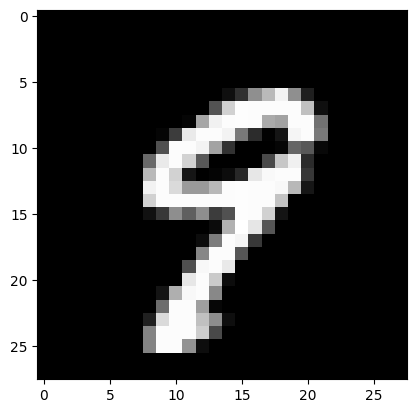

In [ ]:
test_prediction(11, W1, b1, W2, b2, W3, b3)